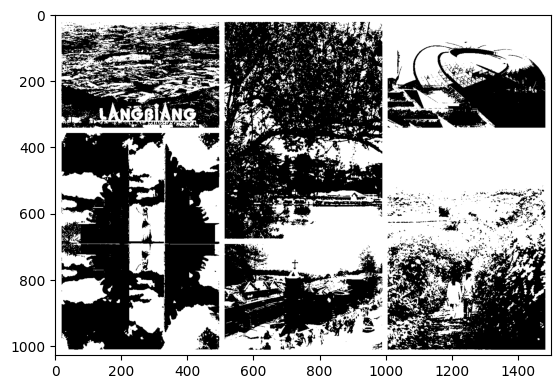

In [ ]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from skimage.filters.thresholding import threshold_otsu

data = Image.open('dalat.jpg').convert('L')

a = np.asarray(data)

# performing Otsu's thresholding
thres = threshold_otsu(a)

# pixels with intensity greater than threshold are kept
b = a > thres

b = Image.fromarray(b)

plt.imshow(b)
plt.show()


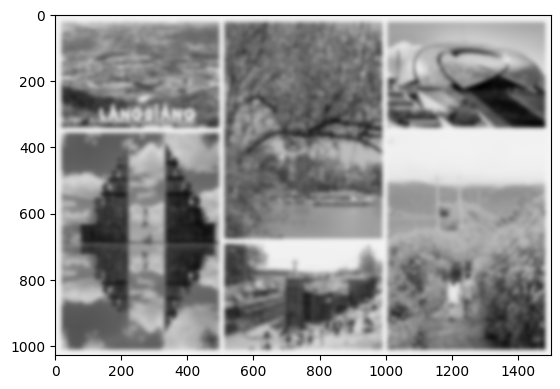

In [4]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from skimage.filters import threshold_local

data = Image.open('dalat.jpg').convert('L')

a = np.asarray(data)

# performing local thresholding
b = threshold_local(a, 39, offset=10)

b = Image.fromarray(b)

plt.imshow(b)
plt.show()


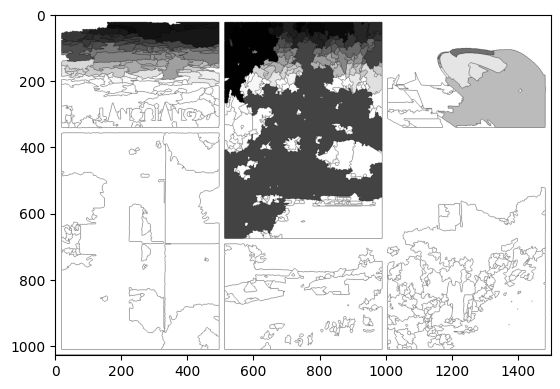

In [5]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = cv2.imread('dalat.jpg')

# converting image from color to grayscale
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)

# thresholding the image to obtain cell pixels
thresh, b1 = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# since Otsu's method has over segmented the image
# erosion operation is performed
b2 = cv2.erode(b1, None, iterations=2)

# distance transform is performed
dist_trans = cv2.distanceTransform(b2, 2, 3)

# thresholding the distance transform image to obtain
# pixels that are foreground
thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)

# performing labeling
labelled, ncc = label(dt)

# labelled is converted to 32-bit integer
labelled = labelled.astype(np.int32)

# performing watershed
cv2.watershed(data, labelled)
b = Image.fromarray(labelled)

plt.imshow(b)
plt.show()


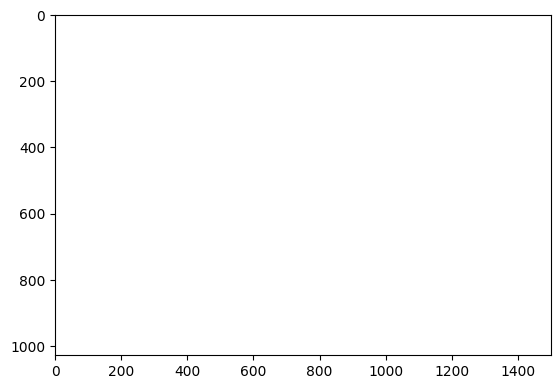

In [6]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('dalat.jpg').convert('L')
b = nd.binary_dilation(data, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()


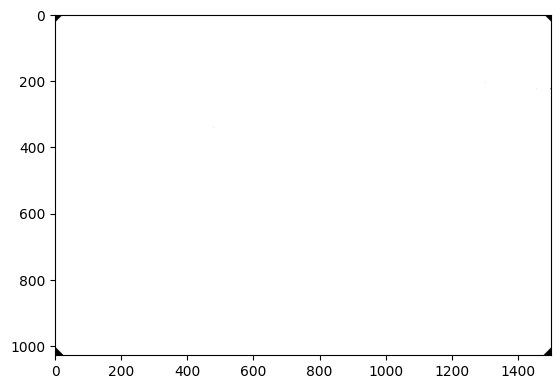

In [7]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('dalat.jpg').convert('L')

# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_opening(data, structure=s, iterations=25)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()


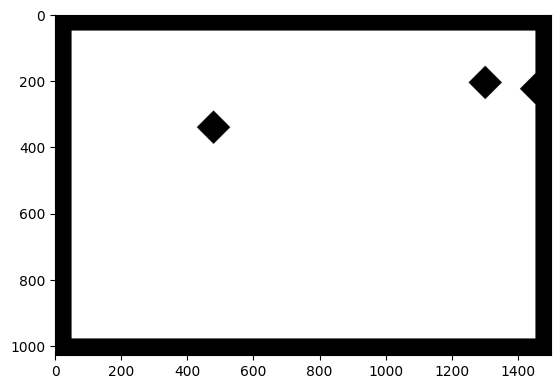

In [8]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('dalat.jpg').convert('L')

# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_erosion(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()


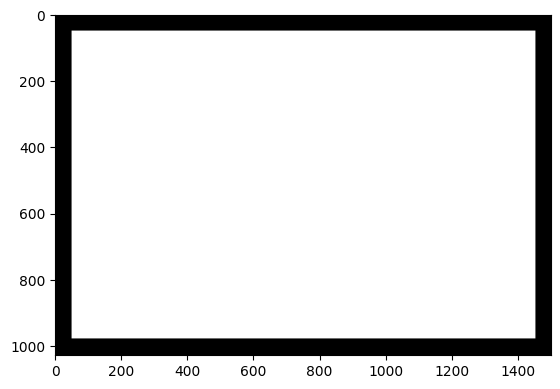

In [9]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('dalat.jpg').convert('L')

# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_closing(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()


baitap

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8180\2181598983.py:13: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (350, 500, 3) looks like that of an RGB image.
  otsu_thresh = threshold_otsu(a)


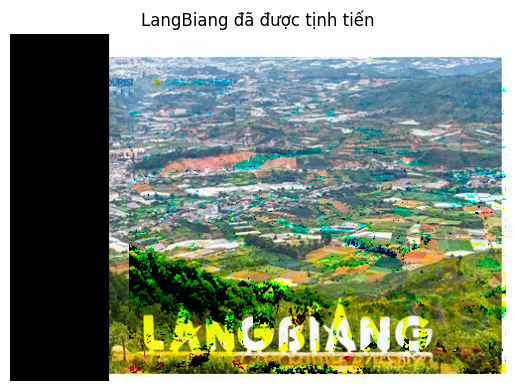

In [18]:
from PIL import Image

# Mở ảnh gốc
img = Image.open("dalat.jpg")

# Cắt vùng LangBiang (phía trên bên trái)
crop_box = (0, 0, 500, 350)  # (left, top, right, bottom)
img = img.crop(crop_box)

a = np.asarray(img)

# Bước 3: Tính ngưỡng Otsu và sửa thành ngưỡng 0.3
otsu_thresh = threshold_otsu(a)
manual_thresh = 0.3 * 255  # vì ảnh grayscale 0-255

# Bước 4: Tạo mặt nạ nhị phân để lấy vùng LangBiang
mask = a > manual_thresh

# Bước 5: Tịnh tiến vùng chọn sang phải 100px
translated_mask = np.zeros_like(mask)
translated_mask[:, 100:] = mask[:, :-100]  # tịnh tiến sang phải

# Bước 6: Áp mặt nạ vào ảnh gốc
result_array = np.zeros_like(a)
result_array[translated_mask] = a[translated_mask]

# Bước 7: Chuyển lại thành ảnh và lưu
result_img = Image.fromarray(result_array)
result_img.save('lang_biang.jpg')  # lưu ra file

# Bước 8: Hiển thị ảnh
plt.imshow(result_img, cmap='gray')
plt.title('LangBiang đã được tịnh tiến')
plt.axis('off')
plt.show()


In [30]:
from PIL import Image
import numpy as np
from scipy.ndimage import rotate
from skimage.filters import threshold_local

# Mở ảnh gốc
img = Image.open("dalat.jpg")

# Cắt vùng Hồ Xuân Hương (nằm ở giữa ảnh, như hình bạn gửi)
# Điều chỉnh toạ độ nếu cần: (left, top, right, bottom)
crop_box = (500, 0, 1000, 700)  # X ~ [500–1000], Y ~ [0–700]
img1 = img.crop(crop_box)

# 3. Xoay ảnh 45 độ
hxh_np = np.array(img1)
rotated = rotate(hxh_np, 45, reshape=True)

# 4. Adaptive thresholding với ngưỡng (offset) = 60
thresh_adapt = threshold_local(rotated, block_size=35, offset=60)
binary = rotated > thresh_adapt

# 5. Chuyển ảnh nhị phân về định dạng ảnh lưu được
output_img = Image.fromarray((binary * 255).astype(np.uint8))

# 6. Lưu ảnh
output_img.save("ho_xuan_huong.jpg")
output_img.show()


In [36]:
from PIL import Image
import numpy as np
from scipy.ndimage import binary_closing

# 1. Mở ảnh grayscale
img = Image.open("quan_truong_lam_vien_cut.jpg").convert("L")
a = np.array(img)

# 2. Coordinate Mapping (flip ảnh ngang)
mapped = np.fliplr(a)

# 3. Chuyển ảnh về nhị phân
# Lấy ngưỡng 128 để phân biệt foreground/background
binary = mapped > 128

# 4. Áp dụng Binary Closing với kernel đúng kích thước 2D
structure = np.array([[0, 1, 0],
                      [1, 1, 1],
                      [0, 1, 0]], dtype=bool)
closed = binary_closing(binary, structure=structure, iterations=5)

# 5. Lưu kết quả
result_img = Image.fromarray((closed * 255).astype(np.uint8))
result_img.save("quan_truong_lam_vien.jpg")
result_img.show()


1. geometric_transformation
   a. Rotate
   b. Scale
   c. Shift
2. segment
   a. Adaptive_thresholding
   b. Binary_dilation
   c. Binary_erosion
   d. Otsu


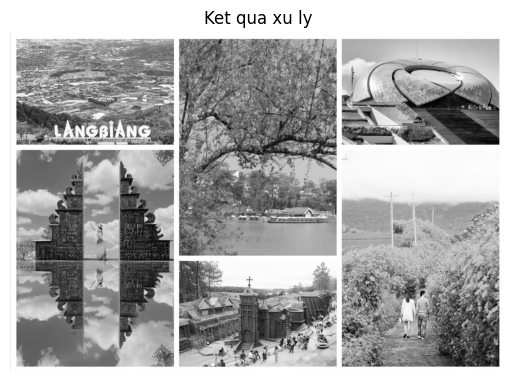

In [38]:
def geometric_rotate(img):
    return rotate(img, angle=45, reshape=True)

def geometric_scale(img):
    return np.array(Image.fromarray(img).resize((int(img.shape[1]*1.5), int(img.shape[0]*1.5))))

def geometric_shift(img):
    shifted = np.zeros_like(img)
    shifted[:, 50:] = img[:, :-50]
    return shifted

def segment_otsu(img):
    t = threshold_otsu(img)
    return img > t

def segment_adaptive(img):
    return img > threshold_local(img, 35, offset=10)

def segment_binary_dilation(img):
    from scipy.ndimage import binary_dilation
    return binary_dilation(img, iterations=20)

def segment_binary_erosion(img):
    from scipy.ndimage import binary_erosion
    return binary_erosion(img, iterations=20)

def menu():
    print("1. geometric_transformation")
    print("   a. Rotate")
    print("   b. Scale")
    print("   c. Shift")
    print("2. segment")
    print("   a. Adaptive_thresholding")
    print("   b. Binary_dilation")
    print("   c. Binary_erosion")
    print("   d. Otsu")

    choice = input("Nhap lua chon: ")
    img = np.asarray(Image.open("dalat.jpg").convert("L"))

    if choice == "1a": out = geometric_rotate(img)
    elif choice == "1b": out = geometric_scale(img)
    elif choice == "1c": out = geometric_shift(img)
    elif choice == "2a": out = segment_adaptive(img)
    elif choice == "2b": out = segment_binary_dilation(img)
    elif choice == "2c": out = segment_binary_erosion(img)
    elif choice == "2d": out = segment_otsu(img)
    else:
        print("Khong hop le"); return

    plt.imshow(out, cmap='gray')
    plt.title("Ket qua xu ly")
    plt.axis("off")
    plt.show()

# Goi menu de su dung:
menu()